In [2]:
import frontiers_yildizetal as fy
from frontiers_yildizetal.scalar_emulators2 import *
import pkg_resources
import pandas as pd
import numpy as np
from scipy.stats import skew
from matplotlib.lines import Line2D

In [3]:
pem = Simulations('acheron_pem')
pem_scalar = pem.curate_scalars(threshold=0.1, loc_x=1490100, loc_y=5204100)

Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.


In [4]:
ac = ScalarEmulators('acheron', h_threshold=0.1, loc_x=1490100, loc_y=5204100)

Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.


In [5]:
scalars = list(pem_scalar.columns)
mcs_analysis = ['mcs1','mcs2','mcs3']
pem_analysis = ['pem1','pem2','pem3']
funcs = [np.mean, np.var, skew]
f_names = ['mean','var','skew']

In [6]:
mcs_moments = {}
for i in scalars:
    for j in mcs_analysis:
        path = 'files/input/input_' + j + '_simple.csv'
        filepath = pkg_resources.resource_filename('frontiers_yildizetal', path)
        input = pd.read_csv(filepath).to_numpy()
        
        predicted = simple.predict_scalar(i, input)[0]
        for k, f in enumerate(funcs):
            naming = j + '_' + i + '_' + f_names[k]
            mcs_moments[naming] = round(f(predicted),3)

The upper bounds of the range parameters are 8.621307 64491.08 44.41758 
The initial values of range parameters are 0.1724261 1289.822 0.8883516 
Start of the optimization  1  : 
The number of iterations is  15 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range parameters are 0.2238966 1588.852 2.063857 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 0.07730886 578.3035 0.3983007 
Start of the optimization  2  : 
The number of iterations is  22 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range parameters are 0.2238966 1588.852 2.063857 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The upper bounds of the range parameters are 8.621307 64491.08 44.41758 
The initial values of range parameters are 0.1724261 1289.822 0.8883516 
Start of the optimization  1  : 
The number of iterations is  15 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range p

In [7]:
pem_moments = {}
for i, mcs in enumerate(pem_analysis):
    data = pem_scalar.iloc[8*i:8*(i+1),:]
    for scalar in scalars:
        for j, f in enumerate(funcs):
            naming = mcs + '_' + scalar + '_' + f_names[j]
            pem_moments[naming] = round(f(data[scalar]),3)
        

In [8]:
import matplotlib.pyplot as plt

In [9]:
x = [1,1,2,2,3,3]
ia_mean = mcs_moments['mcs1_ia_mean'], pem_moments['pem1_ia_mean'], mcs_moments['mcs2_ia_mean'], pem_moments['pem2_ia_mean'], mcs_moments['mcs3_ia_mean'], pem_moments['pem3_ia_mean']
ia_var = mcs_moments['mcs1_ia_var'], pem_moments['pem1_ia_var'], mcs_moments['mcs2_ia_var'], pem_moments['pem2_ia_var'], mcs_moments['mcs3_ia_var'], pem_moments['pem3_ia_var']
ia_skew = mcs_moments['mcs1_ia_skew'], pem_moments['pem1_ia_skew'], mcs_moments['mcs2_ia_skew'], pem_moments['pem2_ia_skew'], mcs_moments['mcs3_ia_skew'], pem_moments['pem3_ia_skew']

In [10]:
da_mean = mcs_moments['mcs1_da_mean'], pem_moments['pem1_da_mean'], mcs_moments['mcs2_da_mean'], pem_moments['pem2_da_mean'], mcs_moments['mcs3_da_mean'], pem_moments['pem3_da_mean']
da_var = mcs_moments['mcs1_da_var'], pem_moments['pem1_da_var'], mcs_moments['mcs2_da_var'], pem_moments['pem2_da_var'], mcs_moments['mcs3_da_var'], pem_moments['pem3_da_var']
da_skew = mcs_moments['mcs1_da_skew'], pem_moments['pem1_da_skew'], mcs_moments['mcs2_da_skew'], pem_moments['pem2_da_skew'], mcs_moments['mcs3_da_skew'], pem_moments['pem3_da_skew']

In [11]:
dv_mean = mcs_moments['mcs1_dv_mean'], pem_moments['pem1_dv_mean'], mcs_moments['mcs2_dv_mean'], pem_moments['pem2_dv_mean'], mcs_moments['mcs3_dv_mean'], pem_moments['pem3_dv_mean']
dv_var = mcs_moments['mcs1_dv_var'], pem_moments['pem1_dv_var'], mcs_moments['mcs2_dv_var'], pem_moments['pem2_dv_var'], mcs_moments['mcs3_dv_var'], pem_moments['pem3_dv_var']
dv_skew = mcs_moments['mcs1_dv_skew'], pem_moments['pem1_dv_skew'], mcs_moments['mcs2_dv_skew'], pem_moments['pem2_dv_skew'], mcs_moments['mcs3_dv_skew'], pem_moments['pem3_dv_skew']

In [12]:
vmax_mean = mcs_moments['mcs1_vmax_mean'], pem_moments['pem1_vmax_mean'], mcs_moments['mcs2_vmax_mean'], pem_moments['pem2_vmax_mean'], mcs_moments['mcs3_vmax_mean'], pem_moments['pem3_vmax_mean']
vmax_var = mcs_moments['mcs1_vmax_var'], pem_moments['pem1_vmax_var'], mcs_moments['mcs2_vmax_var'], pem_moments['pem2_vmax_var'], mcs_moments['mcs3_vmax_var'], pem_moments['pem3_vmax_var']
vmax_skew = mcs_moments['mcs1_vmax_skew'], pem_moments['pem1_vmax_skew'], mcs_moments['mcs2_vmax_skew'], pem_moments['pem2_vmax_skew'], mcs_moments['mcs3_vmax_skew'], pem_moments['pem3_vmax_skew']

In [13]:
hmax_mean = mcs_moments['mcs1_hmax_mean'], pem_moments['pem1_hmax_mean'], mcs_moments['mcs2_hmax_mean'], pem_moments['pem2_hmax_mean'], mcs_moments['mcs3_hmax_mean'], pem_moments['pem3_hmax_mean']
hmax_var = mcs_moments['mcs1_hmax_var'], pem_moments['pem1_hmax_var'], mcs_moments['mcs2_hmax_var'], pem_moments['pem2_hmax_var'], mcs_moments['mcs3_hmax_var'], pem_moments['pem3_hmax_var']
hmax_skew = mcs_moments['mcs1_hmax_skew'], pem_moments['pem1_hmax_skew'], mcs_moments['mcs2_hmax_skew'], pem_moments['pem2_hmax_skew'], mcs_moments['mcs3_hmax_skew'], pem_moments['pem3_hmax_skew']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


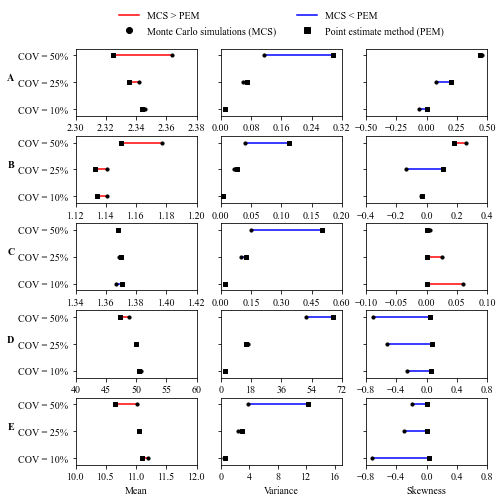

In [72]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12), (ax13,ax14,ax15)) = plt.subplots(nrows=5, ncols=3,sharey='row')

ax1.scatter(ia_mean[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax1.scatter(ia_mean[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax1.hlines(y=[1,2,3], xmin=ia_mean[0:6:2],xmax=ia_mean[1:7:2],color=['r','r','r'],zorder=0)
ax1.set_xlim(2.3,2.38)
ax1.set_xticks(np.arange(2.3,2.39,0.02))
ax1.set_ylim(0.75,3.25)
ax1.set_yticks((1,2,3))
ax1.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax1.set_ylabel('A',rotation=0, ha='right',weight='bold')

ax2.scatter(ia_var[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax2.scatter(ia_var[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax2.hlines(y=[1,2,3], xmin=ia_var[0:6:2],xmax=ia_var[1:7:2],color=['b','b','b'],zorder=0)
ax2.set_ylim(0.75,3.25)
ax2.set_xlim(0,0.32)
ax2.set_xticks(np.arange(0,0.33,0.08))
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
           ncol=2,frameon=False,fancybox=False)
ax2.legend([Line2D([0],[0],color='r'),Line2D([0],[0],marker='o',color='k',lw=0),
            Line2D([0],[0],color='b'), Line2D([0],[0],marker='s',color='k',lw=0)],
           ['MCS > PEM','Monte Carlo simulations (MCS)', 'MCS < PEM', 'Point estimate method (PEM)'],
           loc='upper center', bbox_to_anchor=(0.5,1.7),
           ncol=2,frameon=False,fancybox=False)

ax3.scatter(ia_skew[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax3.scatter(ia_skew[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax3.set_xlim(-0.5,0.5)
ax3.set_ylim(0.75,3.25)
ax3.hlines(y=[1,2,3], xmin=ia_skew[0:6:2],xmax=ia_skew[1:7:2],color=['b','b','r'],zorder=0)
ax3.set_xticks(np.arange(-0.5,0.51,0.25))

ax4.hlines(y=[1,2,3], xmin=da_mean[0:6:2],xmax=da_mean[1:7:2],color=['r','r','r'],zorder=0)
ax4.scatter(da_mean[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax4.scatter(da_mean[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax4.set_xlim(1.12,1.20)
ax4.set_xticks(np.arange(1.12,1.21,0.02))
ax4.set_ylim(0.75,3.25)
ax4.set_yticks((1,2,3))
ax4.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax4.set_ylabel('B',rotation=0, ha='right',weight='bold')

ax5.hlines(y=[1,2,3], xmin=da_var[0:6:2],xmax=da_var[1:7:2],color=['b','b','b'],zorder=0)
ax5.scatter(da_var[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax5.scatter(da_var[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax5.set_ylim(0.75,3.25)
ax5.set_xlim(0,0.2)
ax5.set_xticks(np.arange(0,0.21,0.05))

ax6.hlines(y=[1,2,3], xmin=da_skew[0:6:2],xmax=da_skew[1:7:2],color=['b','b','r'],zorder=0)
ax6.scatter(da_skew[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax6.scatter(da_skew[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax6.set_ylim(0.75,3.25)
ax6.set_xlim(-0.4,0.4)
ax6.set_xticks(np.arange(-0.4,0.41,0.2))

ax7.hlines(y=[1,2,3], xmin=dv_mean[0:6:2],xmax=dv_mean[1:7:2],color=['b','b','b'],zorder=0)
ax7.scatter(dv_mean[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax7.scatter(dv_mean[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax7.set_xlim(1.34,1.42)
ax7.set_xticks(np.arange(1.34,1.43,0.02))
ax7.set_ylim(0.75,3.25)
ax7.set_yticks((1,2,3))
ax7.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax7.set_ylabel('C',rotation=0, ha='right',weight='bold')

ax8.hlines(y=[1,2,3], xmin=dv_var[0:6:2],xmax=dv_var[1:7:2],color=['b','b','b'],zorder=0)
ax8.scatter(dv_var[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax8.scatter(dv_var[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax8.set_ylim(0.75,3.25)
ax8.set_xlim(0,0.6)
ax8.set_xticks(np.arange(0,0.61,0.15))

ax9.hlines(y=[1,2,3], xmin=dv_skew[0:6:2],xmax=dv_skew[1:7:2],color=['r','r','r'],zorder=0)
ax9.scatter(dv_skew[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax9.scatter(dv_skew[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax9.set_ylim(0.75,3.25)
ax9.set_xlim(-0.1,0.1)
ax9.set_xticks(np.arange(-0.1,0.11,0.05))

ax10.hlines(y=[1,2,3], xmin=vmax_mean[0:6:2],xmax=vmax_mean[1:7:2],color=['r','b','r'],zorder=0)
ax10.scatter(vmax_mean[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax10.scatter(vmax_mean[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax10.set_yticks((1,2,3))
ax10.set_ylim(0.75,3.25)
ax10.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax10.set_xlim(40,60)
ax10.set_xticks(np.arange(40,61,5))
ax10.set_ylabel('D',rotation=0, ha='right',weight='bold')

ax11.hlines(y=[1,2,3], xmin=vmax_var[0:6:2],xmax=vmax_var[1:7:2],color=['b','r','b'],zorder=0)
ax11.scatter(vmax_var[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax11.scatter(vmax_var[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax11.set_ylim(0.75,3.25)
ax11.set_xlim(0,72)
ax11.set_xticks(np.arange(0,73,18))

ax12.hlines(y=[1,2,3], xmin=vmax_skew[0:6:2],xmax=vmax_skew[1:7:2],color=['b','b','b'],zorder=0)
ax12.scatter(vmax_skew[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax12.scatter(vmax_skew[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax12.set_ylim(0.75,3.25)
ax12.set_xlim(-0.8,0.8)
ax12.set_xticks(np.arange(-0.8,0.81,0.4))

ax13.hlines(y=[1,2,3], xmin=hmax_mean[0:6:2],xmax=hmax_mean[1:7:2],color=['r','b','r'],zorder=0)
ax13.scatter(hmax_mean[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax13.scatter(hmax_mean[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax13.set_yticks((1,2,3))
ax13.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax13.set_ylim(0.75,3.25)
ax13.set_xlim(10,12)
ax13.set_xticks(np.arange(10,12.1,0.5))
ax13.set_ylabel('E',rotation=0, ha='right',weight='bold')
ax13.set_xlabel('Mean')

ax14.hlines(y=[1,2,3], xmin=hmax_var[0:6:2],xmax=hmax_var[1:7:2],color=['b','b','b'],zorder=0)
ax14.scatter(hmax_var[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax14.scatter(hmax_var[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax14.set_ylim(0.75,3.25)
ax14.set_xlim(0,17)
ax14.set_xticks(np.arange(0,17,4))
ax14.set_xlabel('Variance')

ax15.hlines(y=[1,2,3], xmin=hmax_skew[0:6:2],xmax=hmax_skew[1:7:2],color=['b','b','b'],zorder=0)
ax15.scatter(hmax_skew[0:6:2],x[0:6:2],color='k',marker='o', s=10)
ax15.scatter(hmax_skew[1:7:2],x[0:6:2],color='k',marker='s', s=10)
ax15.set_ylim(0.75,3.25)
ax15.set_xlim(-0.8,0.8)
ax15.set_xticks(np.arange(-0.8,0.81,0.4))
ax15.set_xlabel('Skewness')

plt.rcParams['figure.figsize'] = [18/2.54,18/2.54]
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10
plt.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.3)

plt.savefig('FigX.pdf', format='pdf', bbox_inches='tight', facecolor='w')